# 2. Probability and Discrete Probability Distributions

## 2.2 The binomial distribution

The binomial distribution is used to model the number of successes out of a fixed number of trials.

Note on terminology: 

- Do not confuse the word "trial" here with the idea of a clinical trial or randomised controlled trial. In our discussion of the binomial distribution, we simply mean a Bernoulli trial, which is a statistical experiment which results in a binary outcome. So the trial in question could be whether or not a baby is a male; whether or not someone is alive in 30 days time; whether or not someone experiences a side effect. 

- Similarly, the word "success" can be confusing. We use the word success to denote having the event of interest. It does not imply that this is a good event. In fact, the event we are interested in, in health applications, is often a bad one. It might be diagnosis of cancer or death, in which case a success would refer to someone having cancer or dying. Conversely, if our study was looking at treatments for improving pregnancy rates, our event, and thus the definition of success, might be a couple becoming pregnant. So the word success, in this context, does not necessarily refer to a good event (although sometimes it does!).


### 2.2.1 Example of a binomial distribution

A small study of 8 participants is being run. All 8 participants will be given an experimental drug. The aim of this study is to obtain data about how many people will experience a side-effect of the drug. 

From previous data, the clinical researcher running the trial estimates that the probability of the side-effect is 0.23.

Let $X$ be the number of people in the study (i.e. among the 8 participants) who experience a side-effect. Suppose we are happy to assume that $X$ follows a binomial distribution. Then, using the formula for the probability distribution function that we derive below, we can calculate the probability that $P(X=x)$ for all possible values $x=0,1,...,8$. 

The code below (in R) does that calculation and displays a bar chart of the probability distribution function.

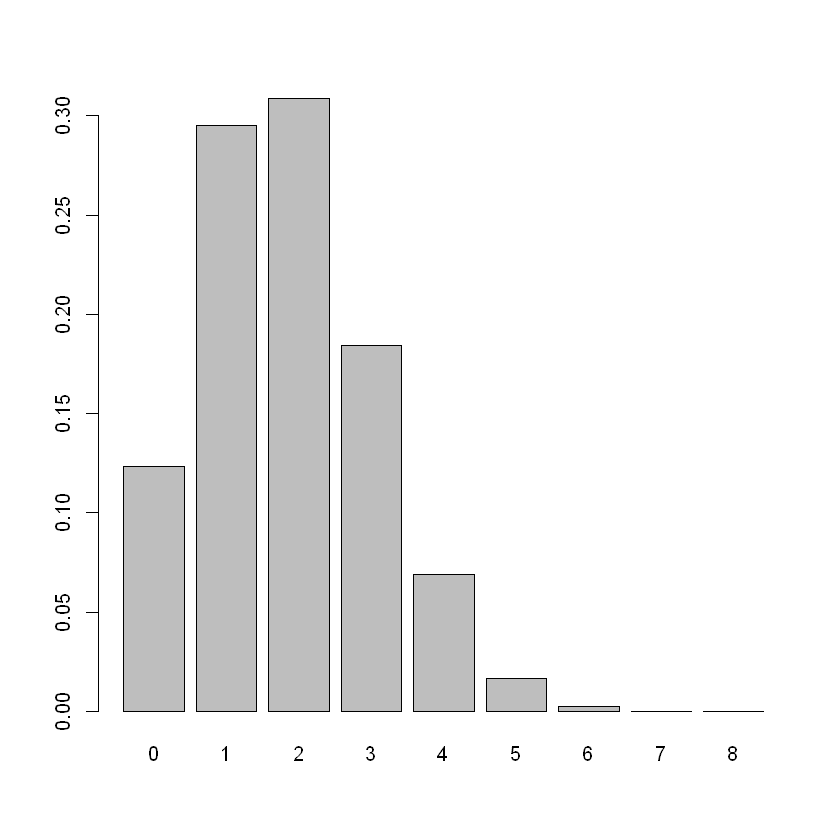

In [1]:
# Obtain the probability distribution function (for values x=0,1,...,8)
x <- seq(0,8)
pi <- 0.23
px <- dbinom(x, 8, pi)

# Create bar chart of PDF
barplot(height=px, names=x)

### 2.2.2  Deriving the binomial distribution


Suppose we are conducting research on quadruplets (sets of four siblings born within the same pregnancy). In this session we will consider the number of boys among a set of quadruplets. 

Let $X$ be the number of boys within a particular set of quadruplets. The sample space for $X$ (the set of possible values $X$ could take) is: $\{0, 1, 2, 3, 4 \}$. We will now derive the full probability distribution function for $X$.  In our calculations, we will assume that the proportion of males at birth is 0.51 and that the gender of each birth is an independent event.


Consider one set of quadruplets. We will start by calculating the probability of no boys i.e. the probability of four girls. By applying the multiplication rule (using the assumption of independence between sex of the children) we obtain:

$$
P(X=0) = P(\mbox{four girls}) = P(GGGG) = 0.49^4,
$$

where $GGGG$ is shorthand for the event that the first child is a girl, *and* the second is a girl, *and* the third is a girl, *and* the fourth is a girl, 

Consider now the probability of one boy and three girls.  This may occur in one of four ways:
BGGG, GBGG, GGBG and GGGB, each of which has probability $0.49^3\times 0.51$.  Thus

$$
P(X=1) = P(\mbox{one boy}) = 4 \times 0.49^3 \times 0.51.
$$

A family of 2 boys and 2 girls will arise in one of the following 6 ways: BBGG, BGBG, BGGB, GBBG, GBGB, GGBB each with a probability $0.49^2 \times 0.51^2$ and a total probability of  

$$
P(X=2) =  P(\mbox{two boys}) = 6 \times 0.49^2 \times 0.51^2.
$$

With similar reasoning we have that

$$
P(X=3) =  P(\mbox{three boys}) = 4 \times 0.49 \times 0.51^3 \\
$$

and

$$
P(X=4) =  P(\mbox{four boys}) = 0.51^4.
$$

We now let $X$ be the random variables which records the number of boys in a randomly selected family of size four. This random variable takes four possible values: 0, 1, 2, 3 or 4. Its probability distribution is given by the following table:


| x  |  P(X=$x$) |
|:---- | ---- | 
| 0 | 0.49$^4$ = 0.0576  |
| 1 | 4 $\times$ 0.49$^3$ $\times$ 0.51 = 0.2400 | 
| 2 | 6 $\times$ 0.49$^2$ $\times$ 0.51$^2$ = 0.3747 | 
| 3 | 4 $\times$ 0.49 $\times$ 0.51$^3$ = 0.2600 | 
| 4 | 0.51$^4$=0.0677 | 

More generally, consider a sequence of $n$ independent observations/trials (in the example above it was four). Each observation results in a binary outcome, e.g. each trial is a success or a failure. In fact, a Binomial sequence is the sum of $n$ independent Bernoulli trials (i.e. $n$ independent Bernoulli variables). Let $\pi$ denote the probability of an individual success (or the defined binary feature, e.g. boy vs. girl).

How do we obtain the probability distribution for the random variable $X$ which records the number of successes in a sequence of $n$ trials? The possible values for the random variable are $0,1,..,n-1,n$. We saw from the previous example that the probability of $x$ successes and $n-x$ failures is

$$
P(X=x) = \pi^{x} (1-\pi)^{n-x} \times \mbox{number of ways of obtaining } x \mbox{ successes}.
$$

The multiplying factor on the right above is the binomial coefficient, i.e. the number of combinations of $x$ objects chosen from $n$.  The number of ways $x$ successes can be obtained from $n$ observations is equal to $^n C_x$ as we are not interested in the order of the successes, only the number of combinations in which such a number of successes could have occurred, and a "success" can be considered the same as "choosing" an object: we are "choosing" $x$ successes and $n-x$ failures out of a "bag" of $n$ successes and failures.

So we have that

$$
P(X=x) = \begin{pmatrix}n \\ x \end{pmatrix} \pi^{x} (1-\pi)^{n-x}
$$



### 2.2.3 General form of the binomial distribution

Suppose we have a sequence of $n$ independent Bernoulli trials (i.e. $n$ independent Bernoulli variables). Let $\pi$ denote the probability of an individual "success".  To write that $X$ follows a binomial distribution with these features, we write $X\sim binomial(n,\pi)$, (where $\sim$ means "follows").

$$
P(X=x) = \begin{pmatrix}n \\ x \end{pmatrix} \pi^{x} (1-\pi)^{n-x}, \mbox{ for } x=0,1,2,..,n.
$$

*Expectation and variance*

The expected value of a binomial variable is $E(X) = n\pi$

The variance of a binomial variable is $Var(X) = n\pi (1-\pi)$



### 2.2.4 Applications of the Binomial distribution


*Assumptions*

In order for a variable to follow a binomial distribution, some "structural" things need to be true. 

1. There must be a fixed number of Bernoulli trials
2. Each trial must result in a binary outcome (success or failure)
3. The outcome we are interested in must be defined as the total number of successes. 

There are also two key *statistical assumptions*, implied by our derivation above:

1. The Bernoulli trials must be *independent* of one another
2. The probability of success must be the same across Bernoulli trials

*Applications*

Suppose we are interested in a particular disease within a large population of $N$ individuals. If, in the population, $M$ is the number of individuals with the disease of interest, then the probability of "success" (i.e. an individual having the disease) is $\pi = M/N$. 

Suppose we take a random sample of $n$ individuals from the large population. We will use $X$ to be the random variable for the number of "successes" out of the $n$ individuals. Then we might be happy to assume that $X$ follows a Binomial distribution.

Notes
- In order for the probability $\pi$ to remain constant, if we took another sample of $n$ we would have to "replace" the original $n$ individuals, so there would be some small possibility of picking the same person twice. In practice, people are not sampled twice. But populations are usually so large that we can ignore this.
- We also need to assume that individual outcomes (here, having the disease or not) are independent. There are many ways in which this could be violated. People within the same family have shared genetics, shared environments, etc. all of which might lead to outcomes that are more similar between family members than between individuals from different families. 
